In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
import statistics as st
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# I will be creating my own class called KNN

In [2]:
def euclidian(point, data):
    #calculate the euclidean distance: sqrt((x1-y1)^2 + (x2-y2)^2 + ...)
    dist = np.sqrt(np.sum((point - data)**2, axis=1))
    return dist

In [3]:
#Check: 
data = np.array([[1,2,3,4],[5,6,7,8]])
point = np.array([3,3,3,3])
euclidian(point, data)

array([2.44948974, 7.34846923])

In [4]:
def mode(values):
    mode = st.mode(values)
    return mode

In [5]:
#Check:
values = [3,3,3,3,3,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,8]
values = ['happy', 'sad', 'happy', 'sad', 'sad']
mode(values)

'sad'

In [6]:
class KNN:
    def __init__(self, k = 5):
        self.k = k
        self.dist = euclidian
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(mode, neighbors))
    
    def evaluate(self, X_test, y_test):
        y_hat = self.predict(X_test)
        accuracy = sum(y_hat == y_test) / len(y_test)
        return accuracy

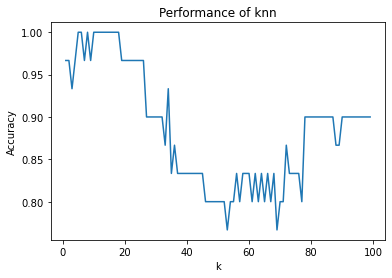

In [7]:
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)
# Test knn model across varying ks
accuracies = []
ks = range(1, 100)
for k in ks:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()